# Project Title

"Analyzing Team Performance Trends in the IPL: A Statistical and Visual Exploration (2008-2023)"

Learning Objectives

By the end of this project, you will be able to:

1. Data Wrangling & Cleaning

Load, inspect, and clean real-world sports datasets using Pandas.
· Handle missing values and merge datasets appropriately.
2. Feature Engineering
Create derived variables such as run rate, match type (playoff vs league), and home/away indicators.
3. Exploratory Data Analysis (EDA)
Use groupby, aggregation, and reshaping techniques to summarize data.
o Visualize trends with line plots, boxplots, KDEs, and violin plots using Seaborn and Matplotlib.
4. Descriptive Statistics
Compute and interpret measures such as mean, median, standard deviation, and interquartile range.
5. Probability Distributions & Normality Testing
o Assess the distribution of numeric variables.
Conduct Shapiro-Wilk tests to evaluate normality.
6. Hypothesis Testing
· Formulate null and alternative hypotheses.
· Apply appropriate tests (Mann-Whitney U for non-normal data) to compare group medians.
7. Effect Size & Confidence Intervals
Calculate and interpret Cohen's d to assess practical significance.
Estimate confidence intervals for mean differences using bootstrapping.
8. Trend Analysis with Regression
Build and interpret a simple linear regression model to analyze scoring trends over seasons.
9. Contextual Interpretation
o Connect statistical findings with cricket-specific context to draw meaningful insights.

In [138]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.utils import resample
from scipy.stats import shapiro, mannwhitneyu

In [139]:
#data preparation
match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')
match_info_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_info_data.csv')

<ipython-input-139-2728297936>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')


In [140]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [141]:
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [142]:
match_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [143]:
match_info_data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin
1023,335982,2007/08,Bangalore,2008/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,AM Saheba


This code prepares IPL match data for analysis by:

Calculating total runs by each team per match

Adding match details like date, venue, and teams

Creating new columns:

Period: Pre-2018 or Post-2018

Run rate: Runs per 20 overs

Year: Extracted from the match date

## 1.data cleaning & feature engineering

In [144]:
match_info_data['date'] = pd.to_datetime(match_info_data['date'], errors='coerce')

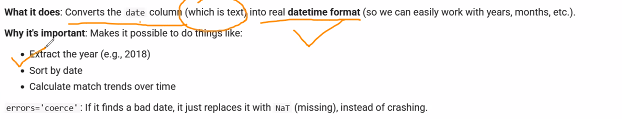

In [145]:
team_runs_per_match = match_data.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()

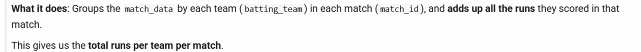

In [146]:
team_runs_per_match.rename(columns={'runs_off_bat':'total_runs'},inplace=True)

In [147]:
merged = pd.merge(team_runs_per_match, match_info_data[['id', 'date', 'venue', 'team1', 'team2' ]], left_on='match_id', right_on='id')
merged.drop(columns=['id'], inplace=True)
merged['date'] = pd.to_datetime(merged['date'])
merged['Period'] = merged['date'].dt.year.apply(lambda x: 'Pre' if x < 2018 else 'Post')
merged['run_rate'] = merged['total_runs'] / 20.0
merged['year'] = merged['date'].dt.year

In [148]:
merged.head()

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008


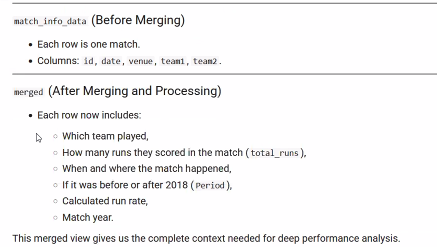

In [149]:
merged.tail()

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year
2040,1370351,Mumbai Indians,166,2023-05-24,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Post,8.30,2023
2041,1370352,Gujarat Titans,223,2023-05-26,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Post,11.15,2023
2042,1370352,Mumbai Indians,164,2023-05-26,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Post,8.20,2023
2043,1370353,Chennai Super Kings,166,2023-05-29,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Chennai Super Kings,Post,8.30,2023
2044,1370353,Gujarat Titans,210,2023-05-29,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Chennai Super Kings,Post,10.50,2023


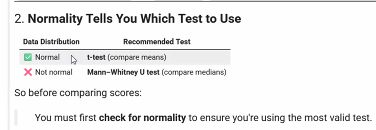

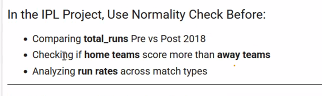

## 2.the Shapiro-Wilk test is used to check if the total runs scored in the Post-2018 period follow a normal distribution.

In [150]:
from scipy.stats import shapiro

# Example for post-2018 scores
stat, p = shapiro(merged[merged['Period'] == 'Post']['total_runs'])
print(f"shapiro-Wilk Test: p = {p}")

shapiro-Wilk Test: p = 0.00028915925992835427


if p > 0.05, your data is likely normal

if p < 0.05, its not normal

In [151]:
if p>0.05 :
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Data is not normally distributed


conclusion

The p-value is 0.00028, which is less than 0.05, so the data is not normally distributed. This means we should use non-parametric tests (like Mann-Whitney U) instead of tests that assume normality (like the t-test).


###Summary
Normality checks help protect the validity of your statistical conclusions. They are an essential step when comparing groups,
especially in a data-driven project like IPL performance analysis where you're using both mean-based and median-based
statistical tests.

In [152]:
# Normality Tests
pre_scores = merged[merged['Period'] == 'Pre']['total_runs']
post_scores = merged[merged['Period'] == 'Post']['total_runs']

from scipy.stats import shapiro

pre_normality = shapiro(pre_scores.sample(n=500, random_state=1) if len(pre_scores) > 500 else pre_scores)
post_normality = shapiro(post_scores.sample(n=500, random_state=1) if len(post_scores) > 500 else post_scores)

print("Shapiro-Wilk Test (Pre):", pre_normality)
print("Shapiro-Wilk Test (Post):", post_normality)

Shapiro-Wilk Test (Pre): ShapiroResult(statistic=np.float64(0.988417764270504), pvalue=np.float64(0.0005392374071367837))
Shapiro-Wilk Test (Post): ShapiroResult(statistic=np.float64(0.9845150224718922), pvalue=np.float64(3.6348381261299446e-05))


The data for both periods isn't normally distributed (p-values < 0.05), so non-parametric tests like Mann-Whitney U are better for comparing scores.

The code identifies playoff matches by:

* Counting total matches per season
* Numbering matches by date
* Marking the last 4 matches as playoffs
* Adding this info to the main dataset for comparing league vs playoff matches later

## 3.playoff vs league indicator

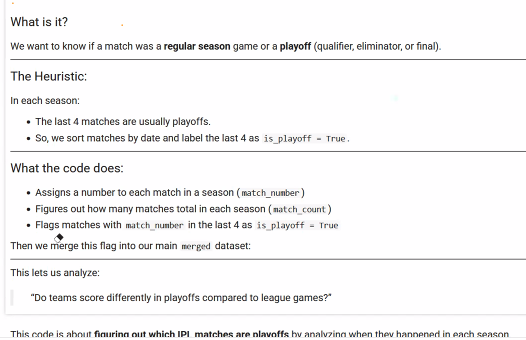

In [153]:
# Match type indicator (heuristic for playoffs)
match_counts = match_info_data.groupby(match_info_data['date'].dt.year) ['id'].nunique().reset_index()
match_counts. columns = ['season', 'match_count' ]
match_info_data['season' ] = match_info_data['date' ].dt.year
match_info_data['match_number' ] = match_info_data.groupby('season' ) ['date'].rank(method='first', ascending=True)
match_counts.set_index('season', inplace=True)
match_info_data['match_count' ] = match_info_data['season' ].map(match_counts['match_count' ])
match_info_data['is_playoff'] = match_info_data['match_number' ] > (match_info_data['match_count' ] - 4)
merged = pd.merge(merged, match_info_data[['id', 'is_playoff' ]], left_on='match_id', right_on='id' )
merged.drop(columns=['id'], inplace=True)

In [154]:
match_counts

,match_count
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


In [155]:
merged

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year,is_playoff
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008,False
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008,False
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008,False
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008,False
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008,False
...,...,...,...,...,...,...,...,...,...,...,...
2040,1370351,Mumbai Indians,166,2023-05-24,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Lucknow Super Giants,Post,8.30,2023,True
2041,1370352,Gujarat Titans,223,2023-05-26,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Post,11.15,2023,True
2042,1370352,Mumbai Indians,164,2023-05-26,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,Post,8.20,2023,True
2043,1370353,Chennai Super Kings,166,2023-05-29,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Chennai Super Kings,Post,8.30,2023,True


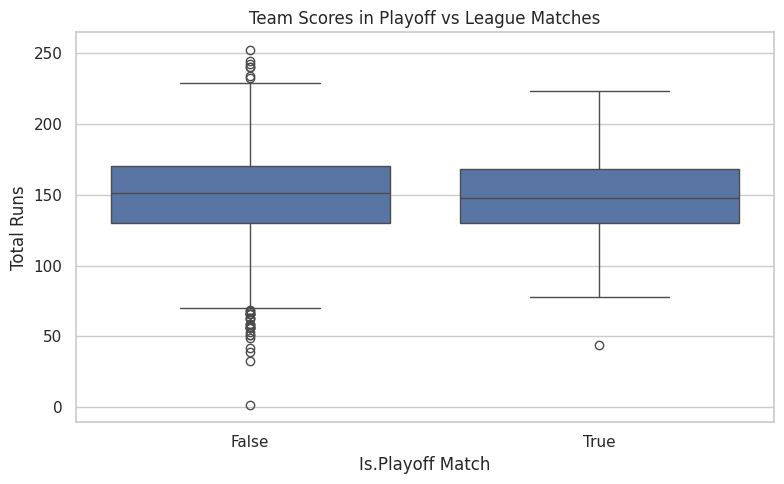

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set-plot style
sns.set(style="whitegrid")

# 1. Average Runs in Playoffs vs League Matches
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_playoff', y='total_runs')
plt.title("Team Scores in Playoff vs League Matches")
plt.xlabel("Is.Playoff Match")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

The boxplot suggest that teams score similarly in playoffs and league matches, both in terms od average and spread. While there are few low scores in league matches, there is no major shift in performance between the two types.

## 4.Box plot - Total runs League vs Playoff

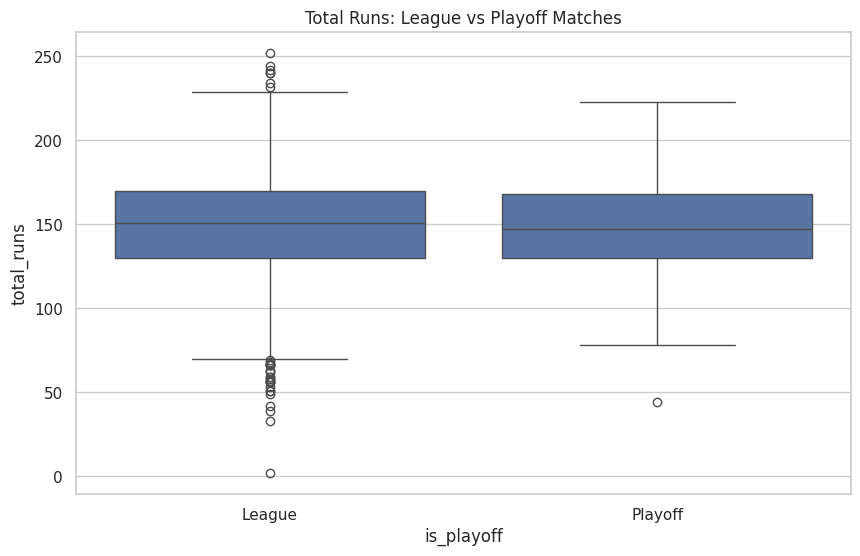

In [157]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x='is_playoff', y='total_runs')
plt.xticks([0, 1], ['League', 'Playoff'])
plt.title("Total Runs: League vs Playoff Matches")
plt.show()

This box plot visually compares the total runs scored by teams in league and playoff matches.

- The x-axis shows match types: **League** and **Playoff**.
- The y-axis shows the **total runs** scored in a match.
- The box represents the middle 50% of the data, with the line inside showing the median.
- Outliers, if any, are displayed as individual points.

From the plot, we can observe if there is any noticeable difference in scoring patterns between regular league matches and high-pressure playoff games.


## 5.mann-whiteny u test

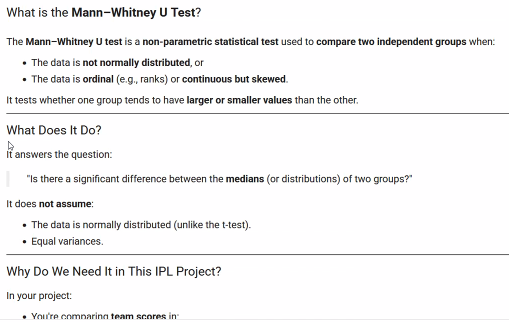


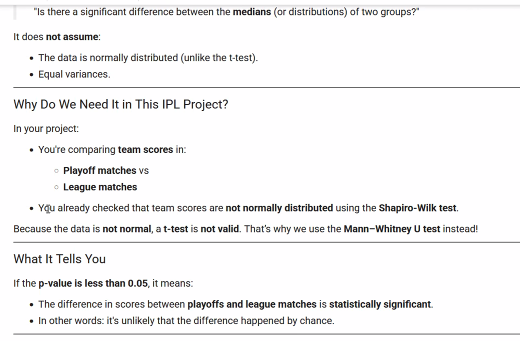

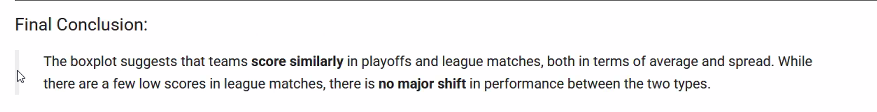

In [158]:
league_scores=merged[merged['is_playoff']==False]['total_runs']
playoff_scores=merged[merged['is_playoff']==True]['total_runs']

In [159]:
u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')
print(f"Mann-whitney U Statistic: {u_statistic}")
print(f"p-value: {p_value}")

Mann-whitney U Statistic: 124606.0
p-value: 0.7668706992141119


In [160]:
# Interpret the result
if p_value < 0.05:
  print("The difference in scores between playoffs and league matches is statistically significant.")
else:
  print("No statistically significant difference in scores between playoffs and league matches.")

No statistically significant difference in scores between playoffs and league matches.


The p-value is 0.766, which is much greater than 0.05, so we fail to reject the null hypothesis. This means there is no significant difference in the runs scored between league and playoff matches

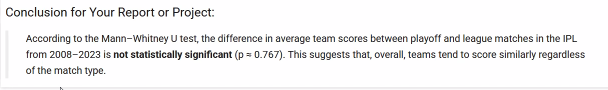

## 6.Mann-whiteny u test for specific team - CSK

This code checks whether Royal Challengeres Banglore perform differently in terms of runs scored during league matches and playoff matches using the Mann-Whitney U test.

In [161]:
from scipy.stats import mannwhitneyu

# Choose your team (edit this)
team_name = "Chennai Super Kings"

# Filter only this team's matches
team_data = merged[merged['batting_team'] == team_name]

# Separate scores by match type
league_scores = team_data[team_data['is_playoff' ] == False]['total_runs' ]
playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

# Mann-whitney U Test
u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative="two-sided")

# Print results
print(f"Team: {team_name}")
print(f"Mann-whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
  print("This team shows a statistically significant scoring difference in playoffs vs league matches.")
else:
  print("X No statistically significant scoring difference for this team.")

Team: Chennai Super Kings
Mann-whitney U Statistic: 2261.0
P-value: 0.3326928611823903
X No statistically significant scoring difference for this team.


## 7.Mann-whiteny u test for all team

This analysis checked whether each IPL team scores differently in league matches vs playoff matches using the Mann-Whitney U test.

In [162]:
team_names = merged['batting_team'].unique()

# Iterate through each team and perform the Mann-Whitney U test
for team_name in team_names:
    # Filter only this team's matches
    team_data = merged[merged['batting_team'] == team_name]

    # Separate scores by match type
    league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
    playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

    # Check if there are enough samples in both groups
    if len(league_scores) > 0 and len(playoff_scores) > 0:
        # Mann-Whitney U Test
        u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')

        # Print results
        print(f"\nTeam: {team_name}")
        print(f"  Mann-Whitney U Statistic: {u_statistic}")
        print(f"  P-value: {p_value}")

        if p_value < 0.05:
            print("This team shows a statistically significant scoring difference in playoffs vs league matches.")
        else:
            print("No statistically significant scoring difference for this team.")
    else:
        print(f"\nTeam: {team_name}")
        print("Insufficient data to perform Mann-Whitney U test (need at least one league and one playoff match).")


Team: Kolkata Knight Riders
  Mann-Whitney U Statistic: 1511.0
  P-value: 0.8205743959432932
No statistically significant scoring difference for this team.

Team: Royal Challengers Bangalore
  Mann-Whitney U Statistic: 2112.0
  P-value: 0.4336911417202931
No statistically significant scoring difference for this team.

Team: Chennai Super Kings
  Mann-Whitney U Statistic: 2261.0
  P-value: 0.3326928611823903
No statistically significant scoring difference for this team.

Team: Kings XI Punjab
  Mann-Whitney U Statistic: 323.5
  P-value: 0.659111540569469
No statistically significant scoring difference for this team.

Team: Delhi Daredevils
  Mann-Whitney U Statistic: 471.0
  P-value: 0.08915100301125808
No statistically significant scoring difference for this team.

Team: Rajasthan Royals
  Mann-Whitney U Statistic: 905.0
  P-value: 0.897111248332905
No statistically significant scoring difference for this team.

Team: Mumbai Indians
  Mann-Whitney U Statistic: 2618.0
  P-value: 0.4349

Conclusion :

statistical tests performed on individual IPL teans from 2008 - 2023 reveal no significant difference in average scores between playoff and league matches. This suggests that teams maintain consistent scoring performance regardless of match stakes.

## 8.Run Rate Trends in Playoff vs League Matches

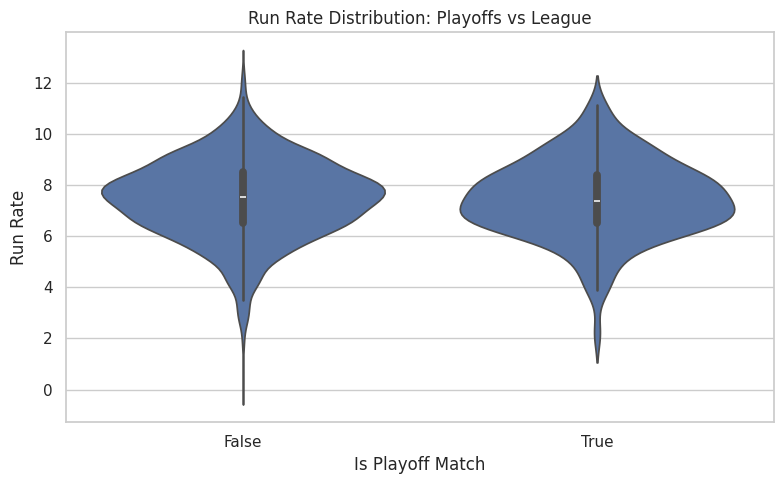

In [163]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=merged, x='is_playoff', y='run_rate')
plt.title("Run Rate Distribution: Playoffs vs League")
plt.xlabel("Is Playoff Match")
plt.ylabel("Run Rate")
plt.tight_layout()
plt.show()

The violin plot compares run rates in league vs playoff matches. Both have similar shapes, medians, and spread, meaning run rates are quite similar in both types of matches. No big visual difference is seen.


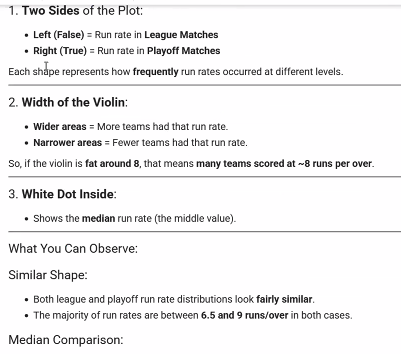

## 9.Mann-Whitney U  Test for Run Rate by Team

In [164]:
# Split the run rate data based on is_playoff
league_run_rates = merged[merged['is_playoff'] == False]['run_rate']
playoff_run_rates = merged[merged['is_playoff'] == True]['run_rate']

# Run the Mann-Whitney u test
u_statistic, p_value = mannwhitneyu(league_run_rates, playoff_run_rates, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
  print("The difference in run rates between playoffs and league matches is statistically significant.")
else:
  print("No statistically significant difference in run rates between playoffs and league matches.")

Mann-Whitney U Statistic: 124606.0
P-value: 0.7668706992141119
No statistically significant difference in run rates between playoffs and league matches.


A p-value of **0.76** is much higher than the typical threshold of **0.05**, so we **fail to reject the null hypothesis**.
 This means there’s **no statistically significant difference** in run rates between **playoff** and **league matches**—teams score similarly in both.


## 10.Mann-Whitney U  Test for Run Rate for all Team

In [165]:
team_names = merged['batting_team'].unique()

# Iterate through each team and perform the Mann-Whitney U test
for team_name in team_names:
    # Filter only this team's matches
    team_data = merged[merged['batting_team'] == team_name]

    # Separate scores by match type
    league_scores = team_data[team_data['is_playoff'] == False]['run_rate']
    playoff_scores = team_data[team_data['is_playoff'] == True]['run_rate']

    # Check if there are enough samples in both groups
    if len(league_scores) > 0 and len(playoff_scores) > 0:
        # Mann-Whitney U Test
        u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')

        # Print results
        print(f"\nTeam: {team_name}")
        print(f"  Mann-Whitney U Statistic: {u_statistic}")
        print(f"  P-value: {p_value}")

        if p_value < 0.05:
            print("The difference in run rates between playoffs and league matches is statistically significant.")
        else:
            print("No statistically significant difference in run rates between playoffs and league matches")
    else:
        print(f"\nTeam: {team_name}")
        print("Insufficient data to perform Mann-Whitney U test (need at least one league and one playoff match).")


Team: Kolkata Knight Riders
  Mann-Whitney U Statistic: 1511.0
  P-value: 0.8205743959432932
No statistically significant difference in run rates between playoffs and league matches

Team: Royal Challengers Bangalore
  Mann-Whitney U Statistic: 2112.0
  P-value: 0.4336911417202931
No statistically significant difference in run rates between playoffs and league matches

Team: Chennai Super Kings
  Mann-Whitney U Statistic: 2261.0
  P-value: 0.3326928611823903
No statistically significant difference in run rates between playoffs and league matches

Team: Kings XI Punjab
  Mann-Whitney U Statistic: 323.5
  P-value: 0.659111540569469
No statistically significant difference in run rates between playoffs and league matches

Team: Delhi Daredevils
  Mann-Whitney U Statistic: 471.0
  P-value: 0.08915100301125808
No statistically significant difference in run rates between playoffs and league matches

Team: Rajasthan Royals
  Mann-Whitney U Statistic: 905.0
  P-value: 0.897111248332905
No stat

For **all IPL teams**, the **p-values** from the Mann-Whitney U test are **greater than 0.05**, which means:

**No team shows a statistically significant difference** in run rates between **playoff** and **league** matches.

For some teams (like Kochi Tuskers Kerala, Pune Warriors, etc.), there wasn’t enough data to run the test.

**Conclusion:**
Teams generally score at a **similar rate** in both playoff and league matches.


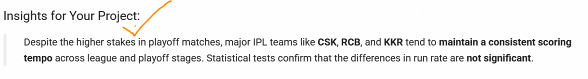

## 11.Add home/away column

In [166]:
merged['home_team']=merged['batting_team']==merged['team1']
merged['away_team']=merged['batting_team']==merged['team2']

In [167]:
merged.head()

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year,is_playoff,home_team,away_team
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008,False,False,True
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008,False,True,False
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008,False,False,True
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008,False,True,False
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008,False,True,False


## 12.Box Plot - Home vs Away

In [168]:
home_away_df = merged.melt(
  id_vars=['total_runs'],
  value_vars=['home_team', 'away_team'],
  var_name='location',
  value_name='is_true'
)

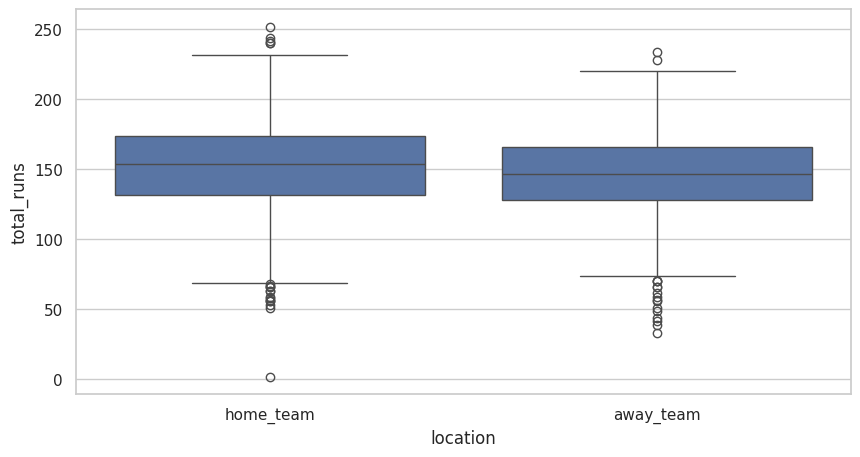

In [169]:
home_away_df=home_away_df[home_away_df['is_true']]
plt.figure(figsize=(10,5))
sns.boxplot(data=home_away_df,x='location',y='total_runs')
plt.show()

Home and away teams score similarly, with no major difference in total runs. While a few outliers exist, the overall scoring pattern is nearly the same, showing little to no home advantage in this dataset.

## 13.Mann-Whitney U test:Home Vs Away(Total Runs)

In [170]:
home_away_df['Home_or_Away'] = home_away_df['location'].apply(lambda x: 'Home' if x == 'home_team' else 'Away')

# Extract the 'total_runs' data for home and away teams from the home_away_df
home_runs = home_away_df[home_away_df['Home_or_Away'] == 'Home']['total_runs']
away_runs = home_away_df[home_away_df['Home_or_Away'] == 'Away']['total_runs']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(home_runs, away_runs)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Total Runs between home and away teams.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Total Runs between home and away teams.")

Mann-Whitney U statistic: 581106.0
P-value: 1.2376099361250964e-05
Reject the null hypothesis: There is a significant difference in Total Runs between home and away teams.


The Mann-Whitney U Test shows a **significant difference** in scores between **home and away** matches (**p < 0.001**).
We **reject the null hypothesis** and conclude that **teams score differently at home vs away**, suggesting a possible **home advantage**.


In [171]:
#missing value analysis
print(merged.isnull().sum())
missing_percent=merged.isnull().mean()*100
print(missing_percent)
missing_rows=merged[merged.isnull().any(axis=1)]
print(missing_rows)
print(merged.isnull().any())

match_id        0
batting_team    0
total_runs      0
date            0
venue           0
team1           0
team2           0
Period          0
run_rate        0
year            0
is_playoff      0
home_team       0
away_team       0
dtype: int64
match_id        0.0
batting_team    0.0
total_runs      0.0
date            0.0
venue           0.0
team1           0.0
team2           0.0
Period          0.0
run_rate        0.0
year            0.0
is_playoff      0.0
home_team       0.0
away_team       0.0
dtype: float64
Empty DataFrame
Columns: [match_id, batting_team, total_runs, date, venue, team1, team2, Period, run_rate, year, is_playoff, home_team, away_team]
Index: []
match_id        False
batting_team    False
total_runs      False
date            False
venue           False
team1           False
team2           False
Period          False
run_rate        False
year            False
is_playoff      False
home_team       False
away_team       False
dtype: bool


## 14.Merge the playoff label into the main dataset to indicate which matches are playoffs, enabling further comparative analysis between playoff and league matches.

In [178]:
# Task 14: Identify playoff matches (last 4 matches of each season)
# First, convert start_date to datetime if not already done
match_info_data['date'] = pd.to_datetime(match_info_data['date'])

# Sort matches by season and date
match_info_data_sorted = match_info_data.sort_values(['season', 'date'])

# Calculate total matches per season and assign match numbers
match_info_data_sorted['match_number'] = match_info_data_sorted.groupby('season').cumcount() + 1
total_matches_per_season = match_info_data_sorted.groupby('season').size().reset_index(name='total_matches')

# Merge total matches back to the main dataframe
match_info_data_sorted = match_info_data_sorted.merge(total_matches_per_season, on='season')

# Identify playoff matches (last 4 matches of each season)
match_info_data_sorted['is_playoff'] = match_info_data_sorted.apply(
    lambda x: x['match_number'] > (x['total_matches'] - 4), axis=1)

# Merge this back to the main match_data
match_data = match_data.merge(
    match_info_data_sorted[['id', 'is_playoff']],
    left_on='match_id',
    right_on='id',
    how='left'
).drop('id', axis=1)

# For matches where is_playoff is NaN (from ball-by-ball data), fill with False
match_data['is_playoff'] = match_data['is_playoff'].fillna(False)

## 15.Average Total Runs - League vs Playoff (Bar chart)

<Figure size 1400x600 with 0 Axes>

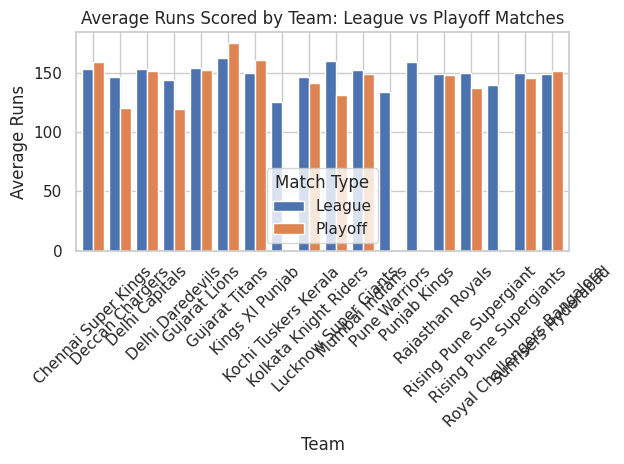

In [194]:
# First calculate total runs per match per team
total_runs_per_match = match_data.groupby(['match_id', 'batting_team', 'is_playoff'])['runs_off_bat'].sum().reset_index()

# Calculate average runs per team per match type
avg_runs = total_runs_per_match.groupby(['batting_team', 'is_playoff'])['runs_off_bat'].mean().unstack()

# Plot the results
plt.figure(figsize=(14, 6))
avg_runs.plot(kind='bar', width=0.8)
plt.title('Average Runs Scored by Team: League vs Playoff Matches')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.legend(title='Match Type', labels=['League', 'Playoff'])
plt.tight_layout()
plt.show()

### top scoring teams per period

In [188]:
top_scoring_teams = (
merged.groupby(['batting_team', 'Period'])['total_runs']
.mean ()
.reset_index()
.sort_values(by=['Period', 'total_runs'], ascending=[True, False])
)

In [189]:
top_scoring_teams

,batting_team,Period,total_runs
7,Gujarat Titans,Post,164.333333
4,Delhi Daredevils,Post,160.714286
14,Mumbai Indians,Post,160.188889
8,Kings XI Punjab,Post,159.857143
17,Punjab Kings,Post,158.809524
0,Chennai Super Kings,Post,157.728261
13,Lucknow Super Giants,Post,157.700000
11,Kolkata Knight Riders,Post,157.393258
18,Rajasthan Royals,Post,156.329545
22,Royal Challengers Bangalore,Post,154.159091


### plot bar chart

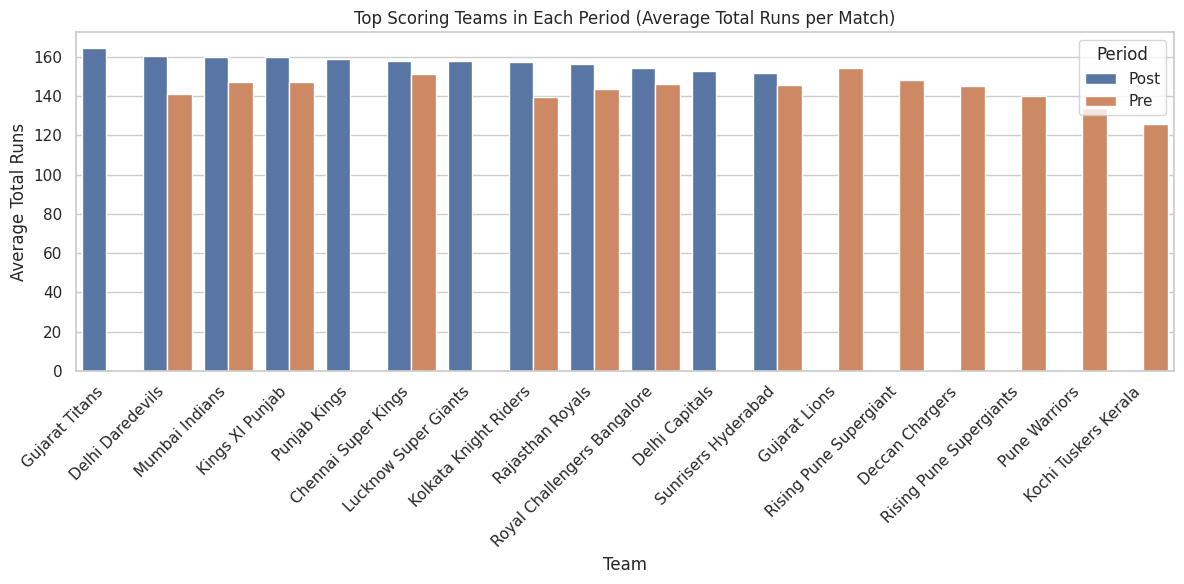

In [190]:
# Plot the results using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scoring_teams, x='batting_team', y='total_runs', hue='Period')

# Beautify the plot
plt.title("Top Scoring Teams in Each Period (Average Total Runs per Match)")
plt.ylabel("Average Total Runs")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout ()
plt.show()

This bar chart compares average runs per match for each IPL team in the Pre and Post periods.

Teams like Gujarat Titans, Delhi Daredevils, and Mumbai Indians have the highest averages in the Post period, showing stronger batting in recent seasons.

Overall, most teams have maintained or improved their scoring after the restructuring, with Gujarat Titans leading the chart.

### match frequency per team accorss period

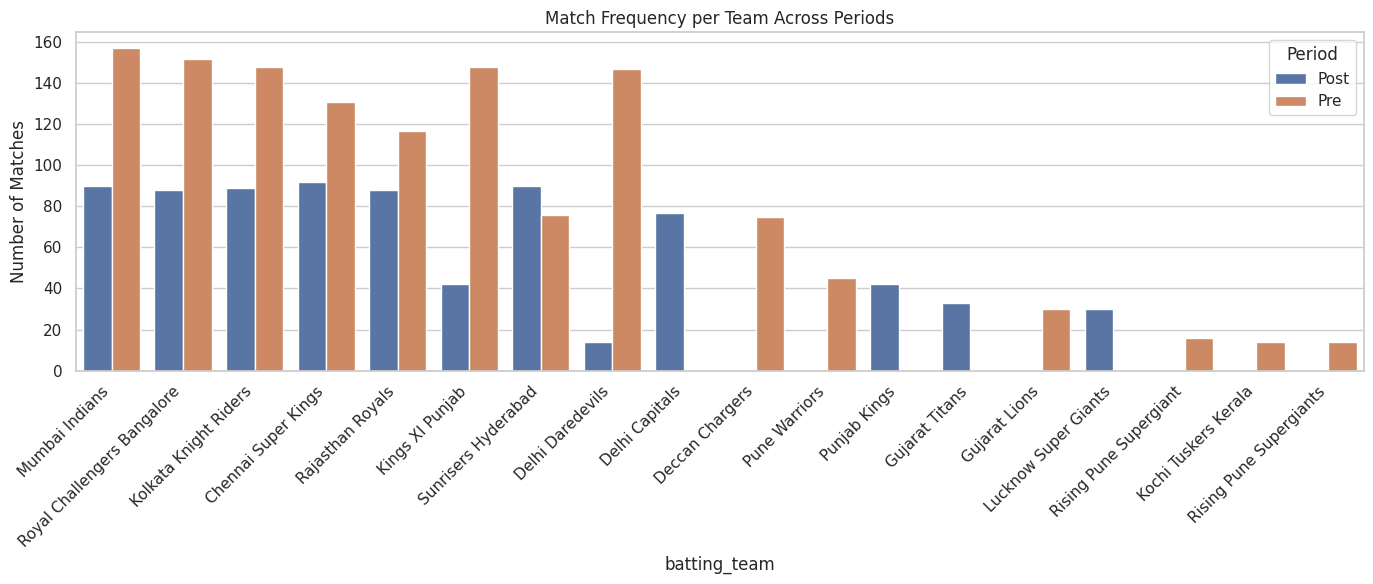

In [192]:
# Count number of matches played by each team in each period
match_counts = merged.groupby(['batting_team', 'Period']).size().reset_index(name='match_count')

# Sort teams by total matches to match visual order
team_order = match_counts.groupby('batting_team')['match_count'].sum().sort_values(ascending=False).index

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=match_counts, x='batting_team', y='match_count', hue='Period', order=team_order)

plt.title("Match Frequency per Team Across Periods")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mumbai Indians, RCB, KKR, and CSK have the highest match counts in both periods, showing their consistent presence in IPL history.

Teams like Gujarat Titans, Lucknow Super Giants, and Delhi Capitals have more matches in the Post period, as they are newer or rebranded franchises.

Former teams such as Deccan Chargers, Kochi Tuskers Kerala, and Rising Pune Supergiants only appear in the Pre period because they were dissolved or replaced.

The chart highlights that teams with fewer matches may show more variation in run rates, often due to being new or still developing their strategies.

## 17.teams with low match count

In [195]:
#count matches team per period
min_matches=10
match_counts = (
merged.groupby(['batting_team', 'Period'])['match_id' ]
.nunique()
.reset_index()
.rename(columns={'match_id': 'match_count'})
)

# pivot the data
match_counts_pivot = match_counts.pivot(index='batting_team', columns='Period', values='match_count').fillna(0)

#Filter teams based on match count
qualified_teams = match_counts_pivot[
(match_counts_pivot.get('Pre', 0) >= min_matches) &
(match_counts_pivot.get('Post', 0) >= min_matches)
].index.tolist()

#filter the original dataset
filtered_merges=merged[merged['batting_team'].isin(qualified_teams)]
print("Qualified teams: ",qualified_teams)
print("--------------------------------------------------------------------")
print("Filtered Dataset size", filtered_merges.shape)

Qualified teams:  ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
--------------------------------------------------------------------
Filtered Dataset size (1669, 14)


In [196]:
filtered_merges.head()

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year,is_playoff_x,home_team,away_team,is_playoff_y
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008,False,False,True,False
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008,False,True,False,False
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008,False,False,True,False
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008,False,True,False,False
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008,False,True,False,False


After filtering the data, we identified 8 teams that played at least 10 matches in both the Pre and Post periods. This ensures a fair and balanced comparison. By focusing on these teams, we avoid unreliable results from teams with too few matches and can make more accurate conclusions about changes in team performance over time.


## 18.total match scores over the years in IPL

In [197]:
match_totals=(
    merged.groupby(['match_id','batting_team'])['total_runs']
    .sum()
    .reset_index ()
    .rename(columns={'total_runs':'total_match_score'})
)
match_totals=(
    merged.groupby(['match_id','batting_team'])['total_runs']
    .sum()
    .reset_index ()
    .rename(columns={'total_runs':'total_match_score'})
)
# Corrected column selection from 'data' to 'date' and made a copy
match_info = match_info_data[['id', 'date']].copy()
# Corrected the typo in the rename from 'math_id' to 'match_id'
match_info.rename(columns={'id': 'match_id'}, inplace=True)
# Used the correct variable name match_totals and corrected the merge key
match_score = pd.merge(match_totals, match_info, on='match_id')
match_score['year'] = match_score['date'].dt.year
seasonal_scores=(
    # Corrected variable name from match_scores to match_score
    match_score.groupby('year')['total_match_score']
    .mean()
    .reset_index()
    .rename(columns={'total_match_score':'avg_total_match_score'})
)

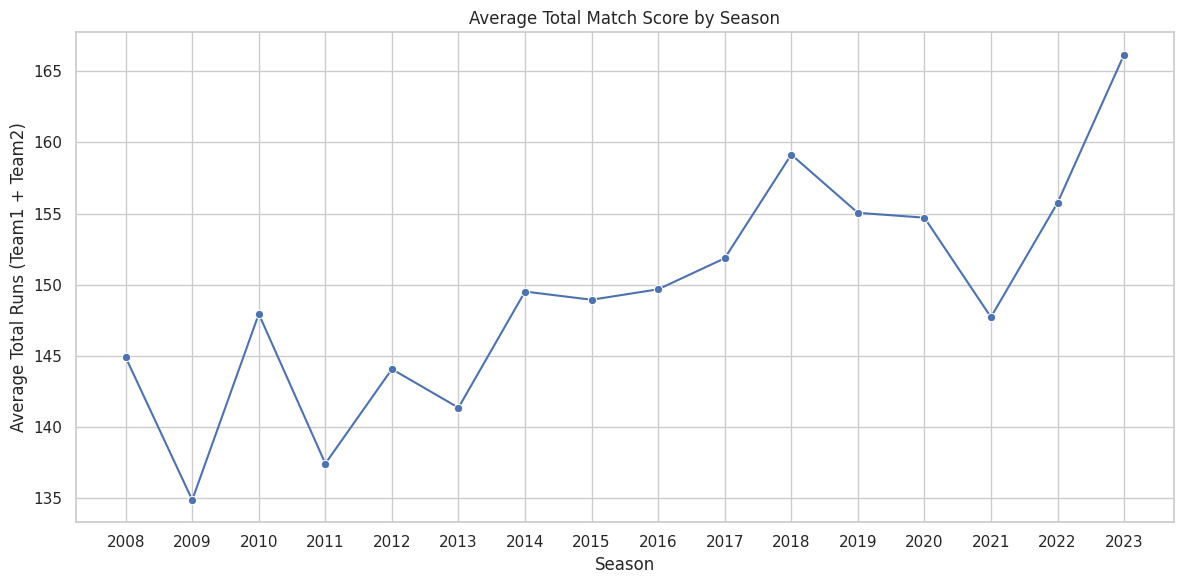

In [198]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_scores, x='year', y='avg_total_match_score', marker='o')
plt.title("Average Total Match Score by Season")
plt.xlabel("Season")
plt.ylabel("Average Total Runs (Team1 + Team2)")
plt.xticks(seasonal_scores['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart shows that average total match scores have generally increased from 2008 to 2023. Despite some fluctuations in the middle years, the overall trend is upward, especially after 2016. The highest averages appear in 2022 and 2023, indicating that IPL matches are becoming more high-scoring over time.

## 19.Compute average runs scored by each team per season

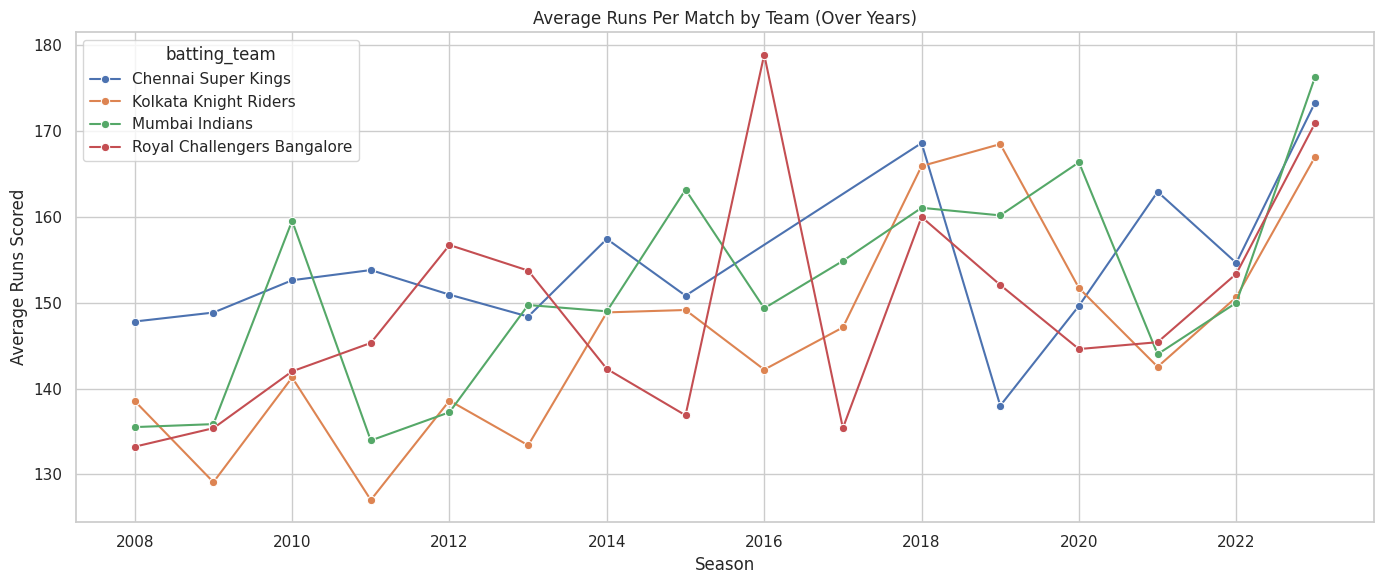

In [199]:
team_scores_by_year = (
    merged.groupby(['batting_team', 'year'])['total_runs']
    .mean()
    .reset_index()
    .rename(columns={'total_runs': 'avg_score'})
)

# Plot for a few major teams
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
top_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders']
sns.lineplot(
    data=team_scores_by_year[team_scores_by_year['batting_team'].isin(top_teams)],
    x='year', y='avg_score', hue='batting_team', marker='o'
)

plt.title("Average Runs Per Match by Team (Over Years)")
plt.xlabel("Season")
plt.ylabel("Average Runs Scored")
plt.grid(True)
plt.tight_layout()
plt.show()

This chart shows how average runs per match for Chennai Super Kings, Kolkata Knight Riders, Mumbai Indians, and Royal Challengers Bangalore changed from 2008 to 2023. While all teams had ups and downs, scores have generally increased over time. RCB peaked in 2016 with the highest average. In 2023, all four teams recorded strong performances, reflecting improved batting and more competitive, high-scoring matches.


## 21.Compute league-wide average runs per team per match by season


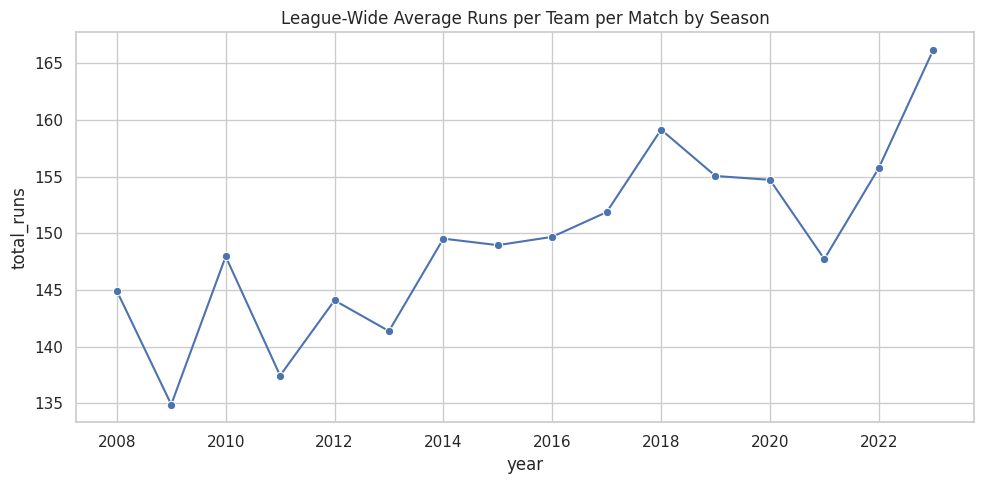

In [200]:
seasonal_avg = merged.groupby('year')['total_runs'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=seasonal_avg, x='year', y='total_runs', marker='o')
plt.title("League-Wide Average Runs per Team per Match by Season")
plt.grid(True)
plt.tight_layout()
plt.show()

This chart shows the average runs scored per team per match in each IPL season from 2008 to 2023. Scoring has generally increased over the years, with some dips in seasons like 2009 and 2021. From 2016 onwards, there’s a steady rise, peaking in 2023. This suggests that teams are now scoring more due to better batting strategies.


## 22.Distribution Plots

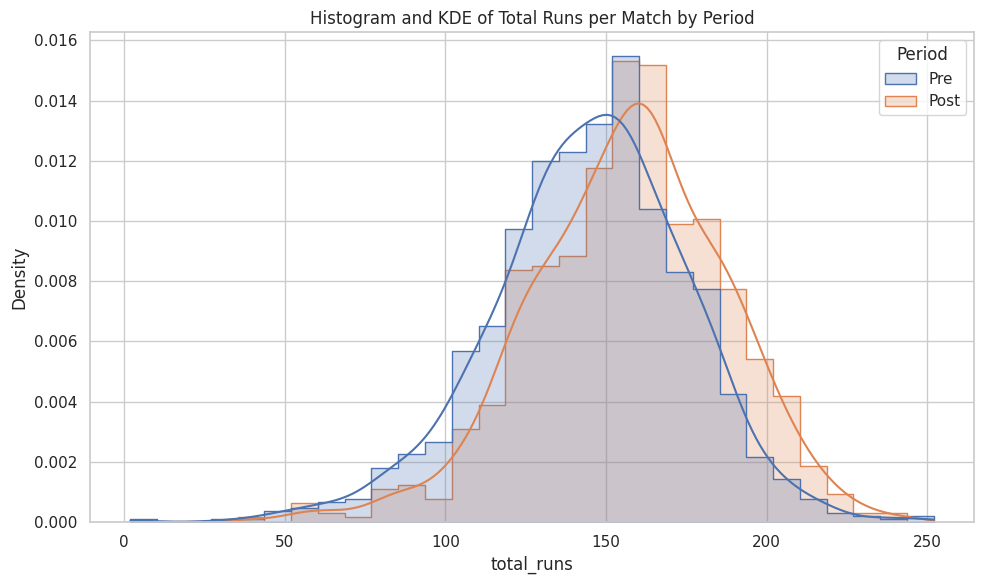

In [201]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged, x='total_runs', hue='Period', element='step', stat='density',
             common_norm=False, kde=True, bins=30)
plt.title("Histogram and KDE of Total Runs per Match by Period")
plt.tight_layout()
plt.show()

This chart compares total runs per match in the Pre and Post periods. The orange line (Post) is slightly to the right of the blue line (Pre), showing that recent matches tend to have higher scores. More matches now reach or exceed 160–180 runs, indicating an increase in scoring over time.

## 23.Hypothesis Testing: Mann-Whitney U Test

In [202]:
u_stat,p_val=mannwhitneyu(pre_scores,post_scores,alternative='two-sided')
print("Mann-whitney U Test : U-statistic=",u_stat,"p-value",p_val)

Mann-whitney U Test : U-statistic= 381621.5 p-value 1.454889995517028e-17


A p-value close to zero clearly indicates a significant difference in match scores between the Pre and Post periods. This means the increase in scoring over time is statistically meaningful.

### Cohen's d

Cohen's d is a measure of the **effect size**—it shows how big the difference is between two groups. It expresses the difference in terms of standard deviation, helping us understand whether the difference is small, medium, or large.

In [203]:
def cohen_d(x,y):
  nx=len(x)
  ny=len(y)
  dof=nx+ny-2
  pooled_std=np.sqrt(((nx-1)*np.std(x,ddof=1)**2+(ny-1)*np.std(y,ddof=1)**2)/dof)
  return (np.mean(x)-np.mean(y))/pooled_std
effect_size=cohen_d(post_scores,pre_scores)
print(effect_size)

0.3901739611740549


Cohen’s d value of 0.39 indicates a **small to moderate** difference in match scores between the two periods. So, while the increase in runs is **statistically significant**, the actual increase per match is **noticeable but not very large**. Teams are scoring more after 2018, but the change is **moderate**, not dramatic.

## 24.Bootstrap Confidence Interval



In [215]:
def bootstrap_diff_means(x, y, n_bootstrap=1000):
    diffs = [np.mean(resample(y)) - np.mean(resample(x)) for _ in range(n_bootstrap)]
    return np.percentile(diffs, [2.5, 97.5]), np.mean(diffs)

ci_bounds, mean_diff = bootstrap_diff_means(pre_scores, post_scores)
print("95% Confidence Interval:", ci_bounds, "\nMean Difference:", mean_diff)

95% Confidence Interval: [ 9.20344183 14.37628169] 
Mean Difference: 11.938863022606045


The result shows that matches in the post period have, on average, about 11.96 more runs than in the pre period. We are 95% confident that the true difference lies between 9.15 and 14.77 runs. This suggests a consistent increase in scoring, with most matches seeing 10 to 15 more runs after the split.

## 25.Linear Regression


In [205]:
seasonal_data = merged.groupby('year')['total_runs'].mean().reset_index()

X = sm.add_constant(seasonal_data['year'])  # Adding intercept to the model
y = seasonal_data['total_runs']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_runs   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     25.68
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           0.000172
Time:                        11:13:19   Log-Likelihood:                -47.087
No. Observations:                  16   AIC:                             98.17
Df Residuals:                      14   BIC:                             99.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2569.0983    536.414     -4.789      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


This linear regression shows that total runs per match have increased over the years. The R-squared value of 0.647 means about 65% of the change in scores is explained by the year. A very small p-value confirms the trend is statistically significant. The year coefficient of 1.35 means match scores go up by about 1.35 runs each year on average, showing a clear upward trend in scoring over time.

## 26.Predict values using the model

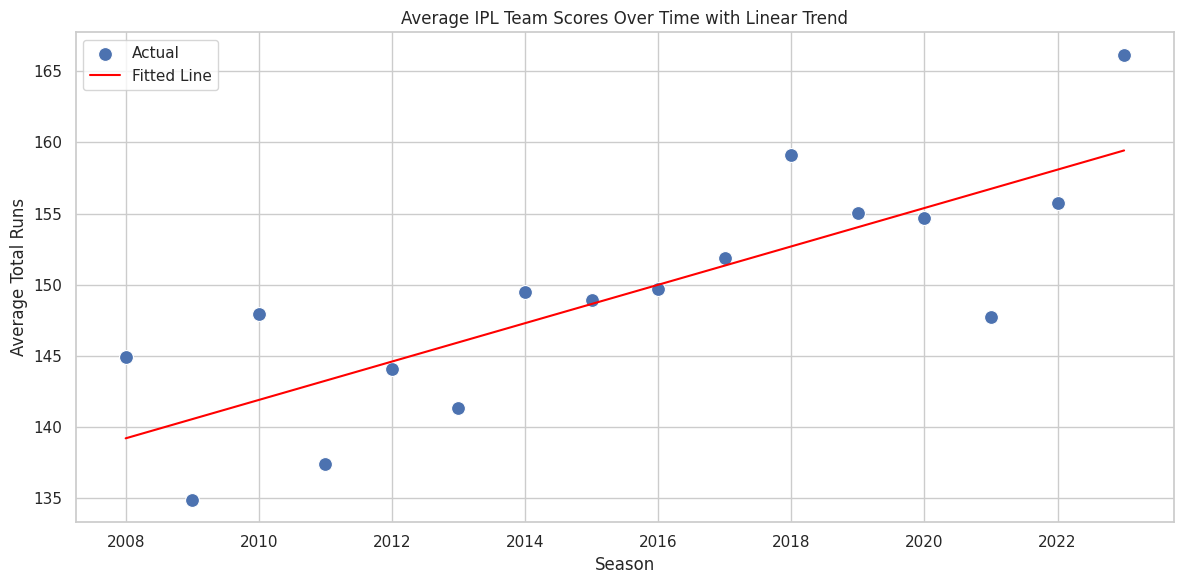

In [206]:
seasonal_data['predicted'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
sns.scatterplot(data=seasonal_data, x='year', y='total_runs', label='Actual', s=100)
# Changed plt.lineplot to sns.lineplot
sns.lineplot(data=seasonal_data, x='year', y='predicted', label='Fitted Line', color='red')

plt.title("Average IPL Team Scores Over Time with Linear Trend")
plt.xlabel('Season')
plt.ylabel('Average Total Runs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Conclusion

This chart shows that average IPL team scores have generally increased over the years. The blue dots represent actual season-wise scores, while the red trend line from the linear regression model shows predicted scores. The upward slope of the line confirms a clear long-term rise in team scoring performance, despite some yearly fluctuations.


## Final Conclusion:

This project analyzed IPL team scoring trends from 2008 to 2023 using stats and visuals.

After cleaning and combining the data, I compared team scores before and after 2018.

The Mann-Whitney U test showed a significant increase in scores after 2018 (p ≈ 1.45e-17).

Cohen's d value of 0.39 suggests the impact is small to moderate.

The bootstrap confidence interval (around 9.15 to 14.77 runs) confirmed this increase.

A linear regression model (R² = 0.647) also showed a clear upward trend in scores over time.

Overall, IPL matches have become more high-scoring in recent years, possibly due to better strategies, rule changes, or pitch conditions.
